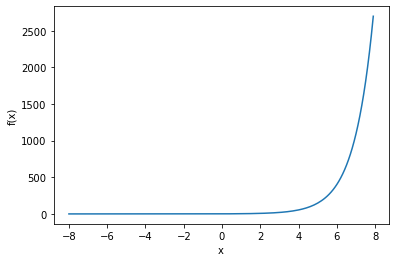

In [2]:
import matplotlib.pylab as plt
import numpy as np

x = np.arange(-8, 8, 0.1)
f = 1 / (np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [11]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        self.synaptic_weights = 2 * random.random((4, 1)) - 1

    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
    
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for i in range(number_of_training_iterations):
            output = self.think(training_set_inputs)
            error = training_set_outputs - output
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += adjustment

    def think(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    neural_network = NeuralNetwork()

    print ("Сформированы начальные синоптические веса: ")
    print (neural_network.synaptic_weights)

    training_set_inputs = array([[0, 0, 0, 0], 
                                 [0, 0, 0, 1],
                                 [0, 0, 1, 1], 
                                 [1, 1, 0, 1], 
                                 [0, 1, 1, 0]])
    
    training_set_outputs = array([[0, 0, 0, 1, 0]]).T

    neural_network.train(training_set_inputs, training_set_outputs, 100000)

    print ("Веса после обучения: ")
    print (neural_network.synaptic_weights)

    print ("Новая ситуация [1, 1, 1, 0] ->")
    print (neural_network.think(array([1, 1, 1, 0])))

Сформированы начальные синоптические веса: 
[[-0.68915935]
 [ 0.47721249]
 [ 0.92352598]
 [-0.16210526]]
Веса после обучения: 
[[ 9.21420292]
 [ 2.22637799]
 [-8.17707283]
 [-5.60212104]]
Новая ситуация [1, 1, 1, 0] ->
[0.96315548]
